In [86]:
# Import python libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime

style.use('ggplot')

In [23]:
# Load data function
def load_data(data_url, file_name, column_name):
    data = pd.read_csv(data_url + file_name) \
             .drop(['Lat', 'Long'], axis=1) \
             .melt(id_vars=['Province/State', 'Country/Region'], \
                   var_name='date', value_name=column_name) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [24]:
# Read the data from the JHU Database
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
data = load_data(data_url, "time_series_19-covid-Confirmed.csv", "CumConfirmed")
#print(data.head())

  Province/State Country/Region       date  CumConfirmed
0          <all>       Thailand 2020-01-22             2
1          <all>          Japan 2020-01-22             2
2          <all>      Singapore 2020-01-22             0
3          <all>          Nepal 2020-01-22             0
4          <all>       Malaysia 2020-01-22             0


In [25]:
# Analyze the country/region portion of the data
countries = data['Country/Region'].unique()
countries.sort()
#print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cruise Ship' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Korea, South' 'Kosovo' 'Ku

In [26]:
# Retain just the US data
us_data = data[data['Country/Region']=="US"].drop(["Country/Region"],axis=1)
us_data.reset_index(inplace=True, drop=True)
#print(us_data)

             Province/State       date  CumConfirmed
0                Washington 2020-01-22             0
1                  New York 2020-01-22             0
2                California 2020-01-22             0
3             Massachusetts 2020-01-22             0
4          Diamond Princess 2020-01-22             0
5            Grand Princess 2020-01-22             0
6                   Georgia 2020-01-22             0
7                  Colorado 2020-01-22             0
8                   Florida 2020-01-22             0
9                New Jersey 2020-01-22             0
10                   Oregon 2020-01-22             0
11                    Texas 2020-01-22             0
12                 Illinois 2020-01-22             0
13             Pennsylvania 2020-01-22             0
14                     Iowa 2020-01-22             0
15                 Maryland 2020-01-22             0
16           North Carolina 2020-01-22             0
17           South Carolina 2020-01-22        

In [27]:
# Analyze the province/state portion of the data
state = data['Province/State'].unique()
state.sort()
print(len(state))

324


In [78]:
# Retain just the MD data
md_data = us_data[us_data['Province/State']=="Maryland"].drop(["Province/State"],axis=1)
md_data.reset_index(inplace=True, drop=True)
#print(md_data)

# Retain just the PA data
pa_data = us_data[us_data['Province/State']=="Pennsylvania"].drop(["Province/State"],axis=1)
pa_data.reset_index(inplace=True, drop=True)
#print(pa_data)

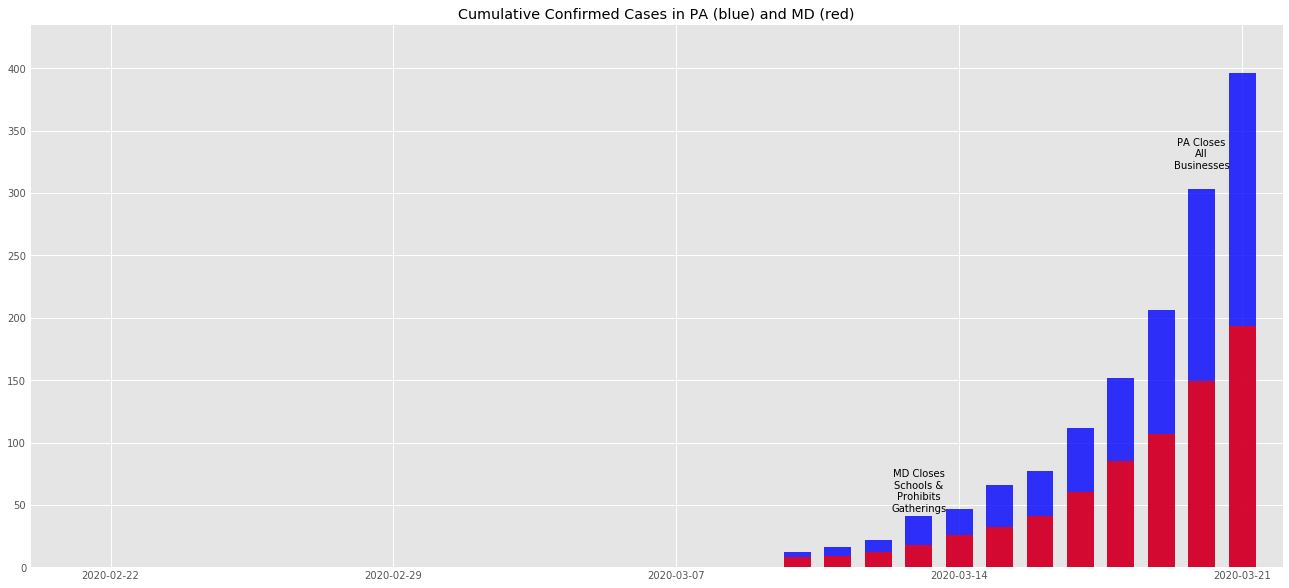

In [143]:
# Plot the data
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
fig_pa = ax.bar(pa_data["date"],pa_data["CumConfirmed"], width=np.timedelta64(16, 'h'), color='b', alpha=0.8)
fig_md = ax.bar(md_data["date"],md_data["CumConfirmed"], width=np.timedelta64(16, 'h'), color='r', alpha=0.8)
ax.axis(["2020-02-20", datetime.date(datetime.now()),0,np.maximum(np.max(pa_data["CumConfirmed"].values),np.max(md_data["CumConfirmed"].values))*1.10])
plt.title("Cumulative Confirmed Cases in PA (blue) and MD (red)")

# Add tick mark at events
for i, fig in enumerate(fig_pa):
    x = fig.get_x()
    wid = fig.get_width()
    height = pa_data["CumConfirmed"].values[i]

    if str(x) == "2020-03-12T16:00:00.000000000":
        ax.text(x + wid/2., 1.05*height, "MD Closes\nSchools &\nProhibits\nGatherings", ha='center', va='bottom', rotation=0)

    if str(x) == "2020-03-19T16:00:00.000000000":
        ax.text(x + wid/2., 1.05*height, "PA Closes\nAll\nBusinesses", ha='center', va='bottom', rotation=0)
        
plt.show()